/home/vagrant/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/vagrant/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


mean f1: 0.992901438023
std f1: 0.00800981750292
mean recall: 0.992901438023
std recall: 0.00800981750292
mean precision: 0.992901438023
std precision: 0.00800981750292


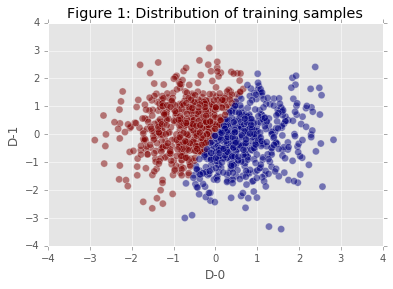

In [1]:
'''
    Question 1
'''
%matplotlib inline
# install required packages 
# bokeh is a visualization package similar to matplotlib 
# but has facier output styles
# !!conda install bokeh -y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# dr
# from bokeh.io import output_notebook
# output_notebook()s
import os

# set plot style
plt.style.use('ggplot')

'''
    Before solving the problems, let's define some convenient functions
    to draw graphss
'''

def scatter(xdata, ydata, color,
            title, xlabel, ylabel,
           pltFuc=None):
    if not pltFuc:
        pltFuc = plt
    pltFuc.scatter(xdata, ydata, c=color, s=50, alpha=0.5)
    pltFuc.xlabel(xlabel)
    pltFuc.ylabel(ylabel)
    pltFuc.title(title)
    pltFuc.legend()
    return pltFuc
    

# load the dataset
data_set_path = os.path.sep.join([
        os.getcwd(),
        "datasets-quiz",
        "dataset-q-1.csv"])
ds1 = pd.read_csv(data_set_path)

scatter(ds1["D-0"].values, ds1["D-1"].values, ds1["C"].values,
        "Figure 1: Distribution of training samples",
        "D-0", "D-1")

# Now we can see the distribution of the training samples
# has a clear separating plane, this problem is most likely a 
# classification problem on a linear-separable data set.

# Train a SVM classifier
from sklearn import svm
from sklearn.cross_validation import train_test_split

model = svm.SVC()
X = ds1.as_matrix(columns=["D-0", "D-1"])
Y = ds1["C"].values

metrics = ["f1", "recall", "precision"]
for m in metrics:
    # 3 rounds done with 3 threads
    scores = cross_val_score(model, X, Y, scoring="f1", n_jobs=3)
    print("mean %s:"%(m), np.mean(scores))
    print("std %s:"%(m), np.std(scores))
    

Rating    3.438433
dtype: float64
Rating    3.504951
dtype: float64


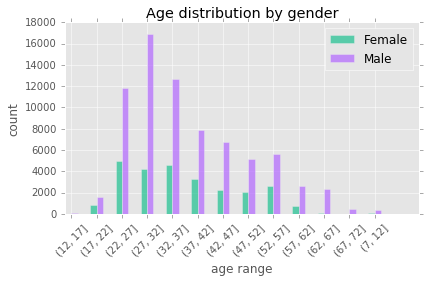

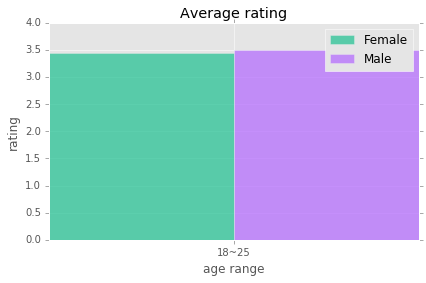

/home/vagrant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:85: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,Name,Rating
0,Someone Else's America (1995),5.000000
1,"Close Shave, A (1995)",4.491071
2,"Usual Suspects, The (1995)",4.385768
3,Stonewall (1995),4.200000
4,Braveheart (1995),4.151515


In [2]:
'''
Question 2
'''
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def b_barchart(data_1, data_2, label_1, label_2, xticks, 
               title='BarChart', xlabel='X', ylabel='Y',rot=None):
    """
        referene: http://matplotlib.org/examples/pylab_examples/barchart_demo.html
    """
    n_groups = len(xticks)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    b_width = 0.25
    opacity = 0.7
    # set colors : http://matplotlib.org/api/colors_api.html
    color_1 = '#1DC190'
    color_2 = '#B266FF'
    # draw sub plots
    r1 = plt.bar(index, data_1, b_width, alpha=opacity, color=color_1,
                label=label_1)
    r2 = plt.bar(index + b_width, data_2, b_width, alpha=opacity, color=color_2,
                label=label_2)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(index + b_width, tuple(xticks), rotation=rot)
    plt.legend()
    plt.tight_layout()
    return plt

movie_path = os.path.sep.join([
        os.getcwd(),
        "datasets-quiz",
        "movie"])
movie_rating_data = pd.read_csv(os.path.sep.join([movie_path, "u.data"]),
                        delimiter="\t")
users = pd.read_csv(os.path.sep.join([movie_path, "u.users"]),
                    delimiter="|")
movie_info = pd.read_csv(os.path.sep.join([movie_path, "u.item-2"]),
                        delimiter="|")
# extract all data
df = all_user_ratings = pd.merge(movie_rating_data, users, 
                          left_on='User-ID', right_on='User-ID')
df.set_index(['Gender', 'Age'])

# Plot age distribution by gender
min_a, max_a = all_user_ratings["Age"].min(), all_user_ratings["Age"].max()
a = all_user_ratings[all_user_ratings['Gender']=='F'][["Age"]]
a = a.groupby(
    pd.cut(a["Age"], 
           np.arange(min_a, max_a, 5)
          )
).count()
b = all_user_ratings[all_user_ratings['Gender']=='M'][["Age"]]
b = b.groupby(
    pd.cut(b["Age"], 
           np.arange(min_a, max_a, 5)
          )
).count()
b_barchart(a.values, b.values, "Female", "Male", sorted(a['Age'].to_dict().keys()), 
           title='Age distribution by gender', xlabel="age range", ylabel="count", rot='45')

# extracted requeted data
female_data = df[(df['Gender']=='F') & (18 <= df['Age']) & (df['Age'] <= 25)]
male_data = df[(df['Gender']=='M') & (18 <= df['Age']) & (df['Age'] <= 25)]

# the average rating by female users between ages 18-25
female_avg_rating = np.mean(female_data[["Rating"]])
# the average rating by male users between ages 18-25
male_avg_rating = np.mean(male_data[["Rating"]])
print(female_avg_rating)
print(male_avg_rating)
b_barchart(female_avg_rating, male_avg_rating, "Female", "Male", ["18~25"],
          title="Average rating", xlabel="age range", ylabel="rating")
plt.show()

df = all_movie_ratings = pd.merge(movie_rating_data, movie_info,
                                      on="Movie-ID")
df = all_1995_movie_ratings = df[df["Name"].str.contains("(1995)")]
# Top 5 rating 1995 movies
df[["Rating", "Name"]].groupby(["Name"]).mean()\
.sort_values(by="Rating", ascending=False).head(5).reset_index()

In [3]:
'''
Question 3
'''
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_path = os.path.sep.join([
        os.getcwd(),
        "datasets-quiz",
        "dataset-q-3"])
data_train = pd.read_csv(os.path.sep.join([data_path, "dataset-train-3.csv"]))
data_test = pd.read_csv(os.path.sep.join([data_path, "dataset-test-3.csv"]))

# drop redundent columns 
X = data_train[data_train.columns[:100]].T.drop_duplicates().T
Y = data_train[data_train.columns[100]].values
X_test = data_train[data_test.columns[:100]].T.drop_duplicates().T
Y_test = data_train[data_test.columns[100]].values

print(X.as_matrix().shape)
print(X_test.as_matrix().shape)

model = LinearRegression()
model.fit(X, Y)

y_pred = model.predict(X_test)
mean_squared_error(Y_test, y_pred)

(1000, 100)
(1000, 100)


5.0365819668375839e-22

[data 1]          F1        F2
0  1.510826  1.014175
1  1.395470 -1.002033


/home/vagrant/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


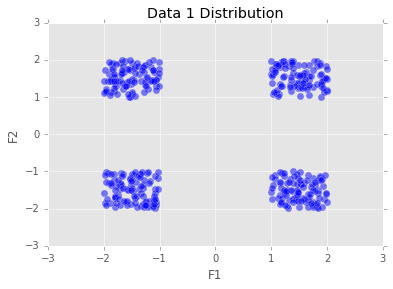

[data 2]          F1        F2
0  0.989388  0.145294
1 -0.989388 -0.145294


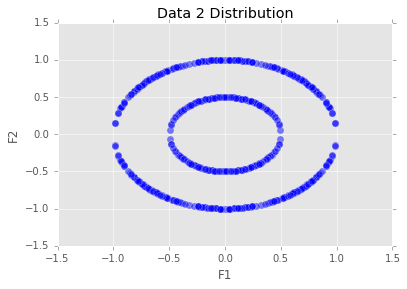

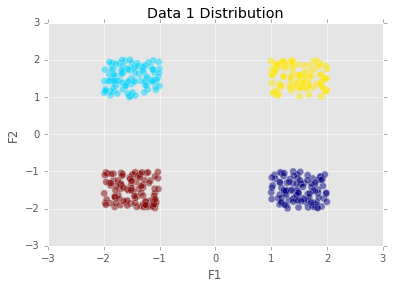

/home/vagrant/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<module 'matplotlib.pyplot' from '/home/vagrant/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

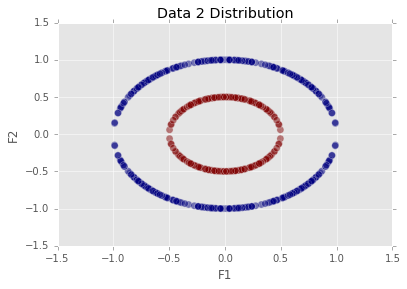

In [4]:
'''
Question 4
'''
import os
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
ds_1 = pd.read_csv(os.path.sep.join(["datasets-quiz", "dataset-q-4", "dataset-4-1.csv"]))
print("[data 1]", ds_1.head(2))
scatter(ds_1["F1"].values, ds_1["F2"].values, None,
            "Data 1 Distribution", "F1", "F2")
plt.show()
ds_2 = pd.read_csv(os.path.sep.join(["datasets-quiz", "dataset-q-4", "dataset-4-2.csv"]))
print("[data 2]", ds_2.head(2))
scatter(ds_2["F1"].values, ds_2["F2"].values, None,
            "Data 2 Distribution", "F1", "F2")
plt.show()

# For data 1 use k-means, k=4 as there are 4 groups
mdl = KMeans(n_clusters=4)
mdl.fit(ds_1)
ds_1_labels = mdl.labels_.astype(np.int)
scatter(ds_1["F1"].values, ds_1["F2"].values, ds_1_labels,
            "Data 1 Distribution", "F1", "F2")
plt.show()
# For data 2 use nearest-neibors
mdl_2 = DBSCAN(eps=.3)
mdl_2.fit(ds_2)
ds_2_labels = mdl_2.labels_.astype(np.int)
scatter(ds_2["F1"].values, ds_2["F2"].values, ds_2_labels,
            "Data 2 Distribution", "F1", "F2")


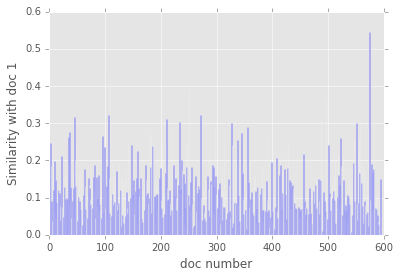

In [5]:
'''
Question 5
'''
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

newsgroups_train = fetch_20newsgroups(subset='train', categories=['sci.space'])

vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(newsgroups_train.data)
first_doc_features = features[0]
similarities = []
for f in range(1, features.shape[0]):
    sim = cosine_similarity(first_doc_features, features[f])
    similarities.append(sim[0][0])
plt.bar(range(2,features.shape[0]+1), similarities, color='blue')
plt.ylabel("Similarity with doc 1")
plt.xlabel("doc number")
plt.show()